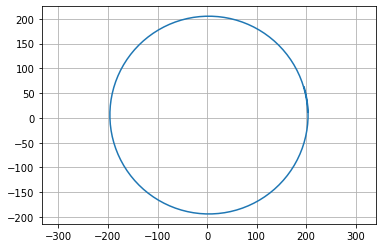

6.0518529415130615


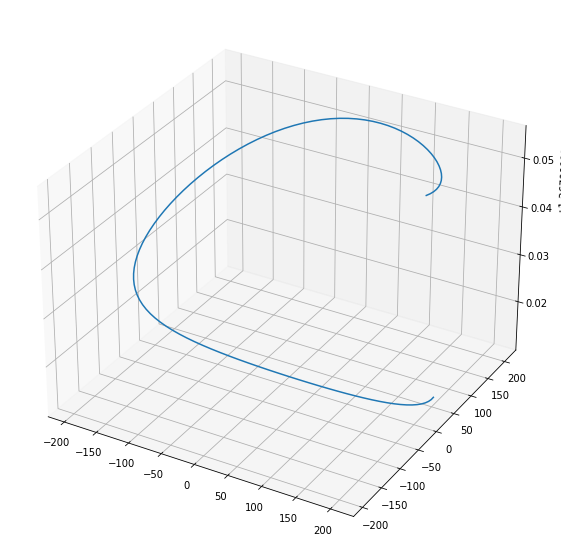

In [18]:
import sympy as sp
from sympy import *
import math as mt

## define the function to find the transformation matrix
def tran(a,alpha,d,theta):

    ## rot@z*trans@z*trans@x*rot@z
    A = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0 ], [sp.sin(theta), sp.cos(theta), 0, 0 ], [0 , 0, 1, 0], [0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d],[0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, a],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])@sp.Matrix([[1, 0, 0, 0], [0, sp.cos(alpha), -sp.sin(alpha), 0], [0, sp.sin(alpha), sp.cos(alpha), 0],[ 0, 0, 0, 1]])
    return A

##define the final transformation matrix

def finalTransformation(t1, t2, t3, t4, t5, t6):
    
    ##transformation of frame 1 to 6 by passing DH parameter to tran function
    A1 = tran(0,-sp.pi/2,26,t1)
    A2 = tran(102.5,0,29,-sp.pi/2+t2)
    A3 = tran(0,sp.pi/2,-17.5,sp.pi/2+t3)
    A4 = tran(0,sp.pi/2,142.49,sp.pi/2+t4)
    A5 = tran(0,-sp.pi/2,0,t5)
    A6 = tran(0,0,0,t6)
    # A7 = tran(0,0,105.5,t7)
    A = A1@A2@A3@A4@A5@A6
    return A

## define the function to find jacobian
def jacobian(t1, t2, t3, t4, t5, t6):
    
    ##transformation of frame 1 to 6 by passing DH parameter to tran function
    A1 = tran(0,-sp.pi/2,26,t1)
    A2 = tran(102.5,0,29,-sp.pi/2+t2)
    A3 = tran(0,sp.pi/2,-17.5,sp.pi/2+t3)
    A4 = tran(0,sp.pi/2,142.49,sp.pi/2+t4)
    A5 = tran(0,-sp.pi/2,0,t5)
    A6 = tran(0,0,0,t6)
    
    ##transformation of each frame WRT to base frame
    T01 = A1
    T02 = A1@A2
    T03 = A1@A2@A3
    T04 = A1@A2@A3@A4
    T05 = A1@A2@A3@A4@A5
    T06 = A1@A2@A3@A4@A5@A6   

    #origin of frame 0
    O0 = sp.Matrix([[0],[0],[0]]) ## origin of 0th frame should be [0,0,0]
    #origin of frame 1
    O1 = T01[0:3,3]      
    #origin of frame 2
    O2 = T02[0:3,3]      
    #origin of frame 3
    O3 = T03[0:3,3]      
    #origin of frame 4
    O4 = T04[0:3,3]      
    #origin of frame 5
    O5 = T05[0:3,3]      
    #origin of frame 6
    O6 = T06[0:3,3]          


    ## Z and o value for J1
    Z0 = sp.Matrix([[0],[0],[1]])
    O_0 = O6 - O0
    ## Z and o value for J2
    Z1 = T01[0:3,2]      
    O_1 = O6 - O1
    ## Z and o value for J3
    Z2 = T02[0:3,2]      
    O_2 = O6 - O2
    #Z and o value for J4
    Z3 = T03[0:3,2]      
    O_3 = O6 - O3
    ## Z and o value for J5
    Z4 = T04[0:3,2]      
    O_4 = O6 - O4
    ## Z and o value for J6
    Z5 = T05[0:3,2]       
    O_5 = O6 - O5

    #construct jacobian matrix
    J = sp.Matrix([[Z0.cross(O_0), Z1.cross(O_1), Z2.cross(O_2), Z3.cross(O_3), Z4.cross(O_4), Z5.cross(O_5)],[Z0, Z1, Z2, Z3, Z5, Z5]])
    
    return J

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import time
start = time.time() #start time
##joint angle vector initial configuration. This matrix will be updated with each iteration
q = sp.Matrix([[0],[mt.pi/2],[-mt.pi/4],[mt.pi/4],[0],[0]])

## initialise the list to store the x, y and z values. This value will be use for plotting the circle.
x = []
y = []
z = []
for i in range (105): 
    ## devide the entire trajectory to be drawn in 100 points
    ## theta is a angle correponding to each points 
    ## theta1 will be corrosponding to the intial position

    theta1 = 0 + (mt.pi*2)*(i)/100
    theta2 = 0 + (mt.pi*2)*(i+1)/100
    
    ## find the transformation matrix from base to end effector in each iteration
    T07 = finalTransformation (q[0,0],q[1,0],q[2,0],q[3,0],q[4,0],q[5,0])

    ## position of ball point in 7th frame
    P7 = sp.Matrix([[0],[0],[0],[1]])

    ## position of ball point in the origin frame
    P07 = T07@P7

    ## add the value of x, y and z in the list at each iteration
    ## This will be used for plotting the circle later
    x.append(P07[0,0])
    y.append(P07[1,0])
    z.append(P07[2,0])
    
    ## call jacobian to find the jacobian matrix for each iteration
    ## take theta3 = 0
    J = jacobian (q[0,0],q[1,0],q[2,0],q[3,0],q[4,0],q[5,0])
    
    ## find the inverse jacobian
    J_inv = J.pinv()
    
    ## find the difference in the position of end effector in each iteration
    dx1 = sp.Matrix([[200*sp.cos(theta1)],[200*sp.sin(theta1)],[0],[0],[0],[0]]) ## current end effector position
    dx2 = sp.Matrix([[200*sp.cos(theta2)],[200*sp.sin(theta2)],[0],[0],[0],[0]]) ## next end effector position
    dx = dx2 - dx1  ## difference in the end effector position
    
    ## update the value of q 
    q = q + J_inv@dx

# plot the circle after finding x and z value at each iteration
plt.grid()
plt.plot(x,y)
plt.axis("equal")
plt.pause(0.05)
plt.show()
end = time.time()
print(end-start) # print time taken to run the code

fig = plt.figure (figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
plt.show()
